In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [3]:
df=pd.read_csv("E://Programs/MACHINE LEARNING WITH PYTHON-GLOBSYN/datasets/bp-age.csv")

In [4]:
df

,bp,age,weight
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


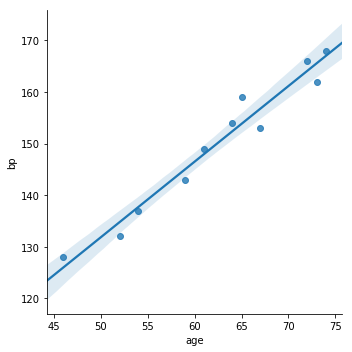

In [5]:
sns.lmplot("age","bp",data=df)

In [6]:
df["bp"].mean()

150.0909090909091

Ordinary Least Square (OLS) Regression
Lasso
Ridge

In [7]:
df=pd.read_csv("E://Programs/MACHINE LEARNING WITH PYTHON-GLOBSYN/datasets/advertising.csv")

In [8]:
df[:3]

,srno,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [9]:
df.drop("srno",axis=1,inplace=True)

In [10]:
df.TV.describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.shape


(200, 4)

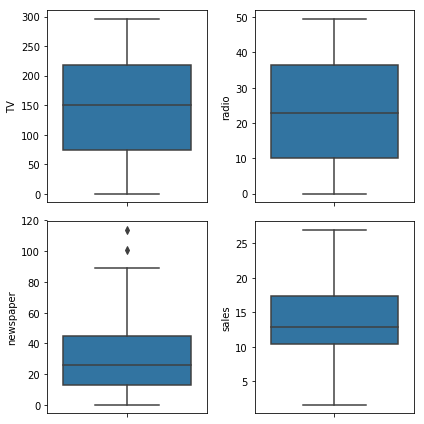

In [13]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(6,6))
axes1=axes.flatten()
index=0
for col in df.columns.values:
    sns.boxplot(y=col,data=df,ax=axes1[index])
    index+=1
plt.tight_layout()
#plt.save()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


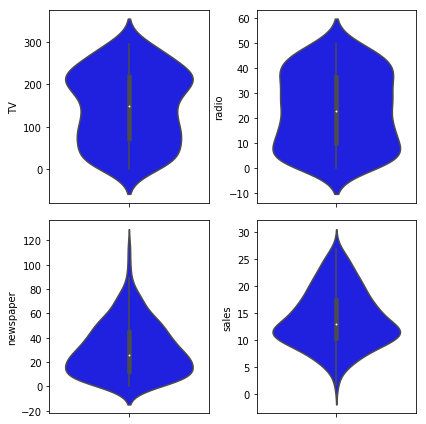

In [14]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(6,6))
axes1=axes.flatten()
index=0
for col in df.columns.values:
    sns.violinplot(y=col,data=df,ax=axes1[index],color="blue")
    index+=1
plt.tight_layout()

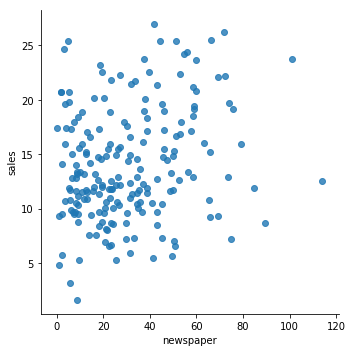

In [15]:
sns.lmplot("newspaper","sales",data=df,fit_reg=False)

In [16]:
#Dipro-2m,Anamik-2m,Arindam-2w,Dipromit-2.5m,Souvik-1m,Roshan-1m,Nishant-3.5m,Bijoy-1m,Mayank-2.5m,ARITRA-3Yongoing.

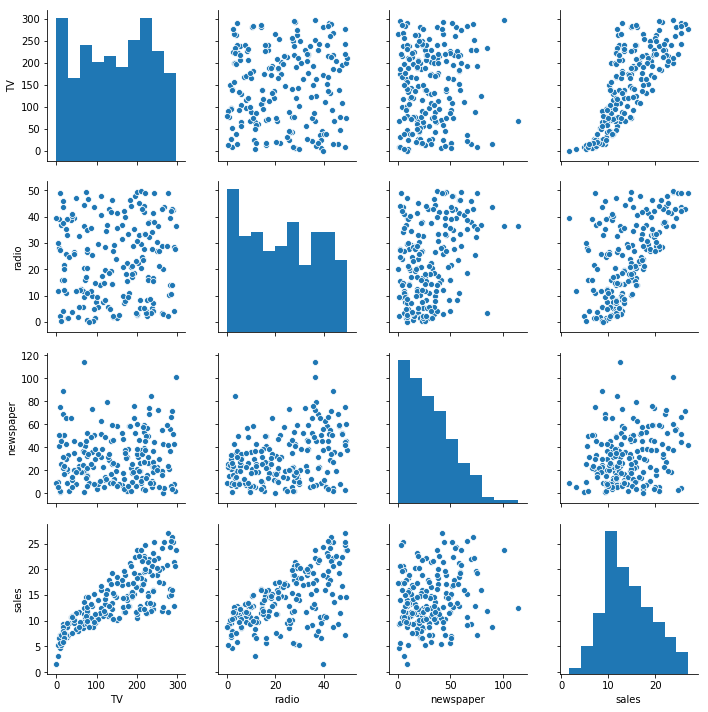

In [17]:
sns.pairplot(df)

In [18]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [21]:
df.corr()["sales"].sort_values(ascending=False) #this is how you sort dataframes

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

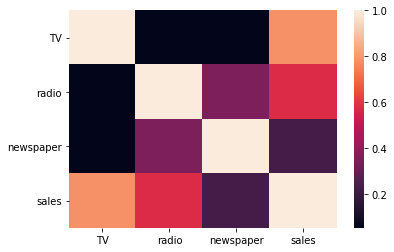

In [22]:
sns.heatmap(df.corr())

In [26]:
X=df.drop("sales",axis=1)
y=df["sales"]

In [27]:
#c0+c1*Tv+c2*radio...
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
model=linear_model.LinearRegression()

In [33]:
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
model.intercept_

2.979067338122629

In [35]:
model.coef_
# Sales = 2.979 + 0.0447 * Tv + c2 * Radio + c3 * 

array([0.04472952, 0.18919505, 0.00276111])

In [49]:
#above two doesn't have any application
yhat=model.predict(Xtest)

In [37]:
Xtest[:1]

,TV,radio,newspaper
95,163.3,31.6,52.9


In [38]:
ytest[:1]

95    16.9
Name: sales, dtype: float64

In [39]:
model.predict([[163.3,31.6,52.9]])

array([16.4080242])

In [44]:
np.sqrt(np.mean((ytest-yhat)**2)) #ROOT OF MEAN SQUARED ERROR

1.78159966153345

In [45]:
yhat=model.predict(Xtrain)

In [46]:
np.sqrt(np.mean((ytrain-yhat)**2)) #ROOT OF MEAN SQUARED ERROR

1.644727765644337

In [50]:
metrics.mean_squared_error(ytest,yhat)

3.174097353976104

In [51]:
model.score(Xtrain,ytrain)

0.8957008271017818